In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import numpy as np

drive.mount('/content/drive')
os.chdir("drive/My Drive/winequality")
files = "winequality-red.csv" 


Mounted at /content/drive


In [ ]:
content = []
with open(files) as f: 
  for line in f:
    line = re.sub("(\n)","",line)
    content.append(line.split(';'))

In [ ]:
red_wine_df = pd.DataFrame(content, columns = ["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol","quality"])
red_wine_df.drop([0], inplace = True)

y = red_wine_df['quality']
x = red_wine_df[["fixed acidity","volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide","density","pH","sulphates","alcohol"]]

In [ ]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1599 non-null   object
 1   volatile acidity      1599 non-null   object
 2   citric acid           1599 non-null   object
 3   residual sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free sulfur dioxide   1599 non-null   object
 6   total sulfur dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   object
dtypes: object(12)
memory usage: 162.4+ KB


**Linear Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import numpy as np

In [ ]:
size = [0.5,0.4,0.3,0.2,0.1]
yvalues_test = {}; intercept = {}; predictions = {}; coeff = {}; xvalues_test = {}; rmse = {}
lr_model = LinearRegression()

for i in range(len(size)):
  current = size[i]
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = current)
  lr_model.fit(x_train,y_train)

  w = lr_model.coef_; b = lr_model.intercept_; coeff[current] = w; intercept[current] = b
  #predict output based on this model
  predictions[current] = lr_model.predict(x_test)
  xvalues_test[current] = x_test
  yvalues_test[current] = y_test


In [ ]:
predictions[0.2]

array([6.12239107, 5.10720226, 5.44509395, 6.00849464, 5.06901218,
       6.31238897, 5.29393475, 5.52570094, 5.23635794, 5.17540095,
       5.27729541, 5.65904078, 5.4864551 , 5.06888535, 5.27354114,
       5.77933812, 5.84389364, 6.14585433, 5.85769141, 5.88612499,
       6.12854856, 6.6331606 , 5.8427194 , 5.16880886, 5.25517019,
       5.86436695, 5.65052506, 4.99191285, 5.41510511, 5.39150618,
       5.44509395, 5.17861826, 5.28244818, 5.23456786, 5.73359205,
       6.60528298, 5.44393781, 5.17328931, 6.22396367, 5.3249637 ,
       6.03013633, 4.8491835 , 5.12802482, 6.18351968, 5.6466348 ,
       5.45690414, 5.27230479, 5.33453406, 5.94715649, 6.47431942,
       5.02821741, 5.34832587, 4.8208139 , 5.98684467, 5.4406575 ,
       4.93932394, 5.42244212, 5.53278817, 5.77109062, 5.22969819,
       5.36735246, 5.63881193, 5.57979088, 5.08108824, 5.49294185,
       6.20995245, 5.20714664, 5.70218708, 6.75702093, 5.13605413,
       5.00113212, 5.47431127, 5.78345613, 5.94717941, 6.02267

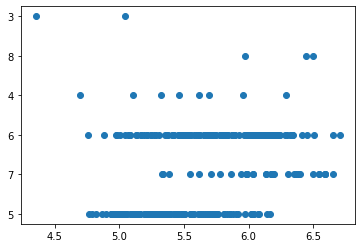

In [ ]:
plt.scatter(lr_model.predict(xvalues_test[0.2]), yvalues_test[0.2])

In [ ]:
#Testing the performance of a model can be done with Mean absolute error, Mean squared error, Root mean squared error. Can also use accuracy

In [ ]:
mse_lr = {}; mae_lr = {}; rmse_lr = {}

for i in range(len(size)):
  current = size[i]
  mse_lr[current] = metrics.mean_squared_error(lr_model.predict(xvalues_test[current]), yvalues_test[current])
  mae_lr[current] = metrics.mean_absolute_error(lr_model.predict(xvalues_test[current]), yvalues_test[current])
  rmse_lr[current] = np.sqrt(metrics.mean_absolute_error(lr_model.predict(xvalues_test[current]), yvalues_test[current]))

In [ ]:
mse_lr

{0.1: 0.4059138863812099,
 0.2: 0.3945446929425115,
 0.3: 0.43707135585105533,
 0.4: 0.41082210858041607,
 0.5: 0.4096315795973484}

In [ ]:
mae_lr

{0.1: 0.4935910592383057,
 0.2: 0.49343859659443917,
 0.3: 0.5074440360614081,
 0.4: 0.49069243325017337,
 0.5: 0.4967903482634079}

**Two layer Neural Networks**

In [ ]:
#Convert data from csvs into arrays
red_wine_data = np.genfromtxt(files, delimiter = ';')

#Removes headers as nan values
red_wine_data = red_wine_data[1:,:] #Numpy arrays are immutable thus can't be deleted. It can only be reassigned.

#Creates quality array from dataset
quality_data = red_wine_data[1:,-1:]

#Creates input array whose values determine the output 
red_wine_input_data = red_wine_data[1:,:-1]